In [2]:
'''
# ДОБАВЬТЕ В НАЧАЛО:
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
'''

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdelghaniaaba/wildfire-prediction-dataset")

print("Path to dataset files:", path)


/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████████████████████████████████████████████████████████████████████████| 1.45G/1.45G [00:46<00:00, 33.4MB/s]

Extracting files...


Path to dataset files: /home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1


In [2]:
# Оптимизация TensorFlow
import tensorflow as tf
tf.config.optimizer.set_jit(True)  # Включение XLA-компиляции
tf.config.threading.set_intra_op_parallelism_threads(8)
#tf.config.threading.set_inter_op_parallelism_threads(8)

# Для GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            #tf.config.experimental.set_memory_limit(gpu, 8192)  # Лимит 8GB
    except RuntimeError as e:
        print(e)

In [ ]:
#!pip install tensorboard

In [3]:
#!pip install scikit-optimize -q

In [5]:
#!pip install optuna -q

In [6]:
#!pip install optuna-integration[tfkeras] -q

In [7]:
#!pip install optuna-dashboard -q

In [3]:
# переключиться на полуточную арифметику (float16)
import tensorflow as tf
from tensorflow.keras.mixed_precision import Policy
policy = Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

In [5]:
!nvidia-smi

Sun Oct 19 18:48:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.01              Driver Version: 576.80         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070        On  |   00000000:01:00.0  On |                  N/A |
|  0%   42C    P8             12W /  200W |     851MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [17]:
!curl -L -o ~/Downloads/animals10.zip\https://www.kaggle.com/api/v1/datasets/download/alessiocorrado99/animals10

curl: (2) no URL specified
curl: try 'curl --help' or 'curl --manual' for more information


In [3]:
# Текущая директория + путь к датасету

import os
HOME = os.getcwd()
print(HOME)
print('-----------------------')
# Пути
#IMAGE_PATH = "/home/oleg/projects/datasets/construction"

IMAGE_PATH = "/home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1"
#IMAGE_PATH = "/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img/"
#dataset_path = "./animals"
#dataset_path = "./cars_pretrained"
#dataset_path = "./construction"
#IMAGE_PATH = dataset_path
os.listdir(IMAGE_PATH)

/home/oleg/projects/ML/Wildfire_Satelite
-----------------------


['valid', 'train', 'test']

In [19]:
!ls /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2

home  raw-img  translate.py


In [14]:
import kagglehub
import os

# Установите переменную окружения ПЕРЕД импортом (если нужно перезапустить kernel)
os.environ['KAGGLE_HUB_CACHE'] = "/home/oleg/projects/datasets/kaggle_cache"

# Если уже импортировали kagglehub, перезапустите kernel или используйте:

# Скачиваем
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Path to dataset files:", path)

import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [ ]:
# как скачать датасет с Kaggle
'''
import os
import kaggle
import zipfile

# Скачаем напрямую через Kaggle API в текущую папку
dataset_name = 'bhavikjikadara/dog-and-cat-classification-dataset'
download_path = './cats_dogs_data'

print("📥 Downloading dataset...")
kaggle.api.dataset_download_files(
    dataset_name, 
    path=download_path, 
    unzip=True  # Важно: распаковываем автоматически!
)
'''

import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

In [ ]:
import os
from PIL import Image
import tensorflow as tf

def clean_corrupted_images(generator):
    """Находит и удаляет битые файлы из генератора"""
    corrupted_files = []
    valid_indices = []
    
    print("🔍 Поиск битых изображений...")
    
    for i, file_path in enumerate(generator.filepaths):
        try:
            # Проверяем через PIL с обработкой truncated images
            with Image.open(file_path) as img:
                img.load()  # Принудительно загружаем все данные
                img.verify()  # Проверяем целостность
            
            valid_indices.append(i)
            
        except Exception as e:
            corrupted_files.append((file_path, str(e)))
            print(f"❌ Удален: {os.path.basename(file_path)} - {e}")
    
    print(f"✅ Валидных файлов: {len(valid_indices)}")
    print(f"❌ Удалено битых файлов: {len(corrupted_files)}")
    
    # Сохраняем список битых файлов
    if corrupted_files:
        with open('corrupted_files.txt', 'w') as f:
            for file_path, error in corrupted_files:
                f.write(f"{file_path} - {error}\n")
    
    return valid_indices

# Очищаем тренировочные данные
print("🧹 Очистка тренировочных данных...")
train_valid_indices = clean_corrupted_images(train_gen)

print("🧹 Очистка валидационных данных...")
val_valid_indices = clean_corrupted_images(valid_gen)

In [52]:
# 🔥 ДОБАВЬТЕ ЭТО В САМОМ НАЧАЛЕ
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Разрешаем truncated images, позволяет загружать "урезанные" (truncated) JPEG файлы

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset base directory
base_dir = IMAGE_PATH

# Define subdirectories for training, validation, and testing
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")

# Define image size and batch size
IMG_SIZE = (224, 224)  # Standard size for VGG16 and ResNet50
BATCH_SIZE = 512        # Number of images per batch

# 🔥 ОПТИМИЗАЦИИ ДЛЯ RTX 4070 (работают с ImageDataGenerator)
tf.config.optimizer.set_jit(True)  # XLA
# 🔥 ОПТИМИЗАЦИИ ДЛЯ TF 3.x
#tf.config.optimizer.set_jit(True)
print('✅ XLA compilation enabled')
#tf.config.threading.set_intra_op_parallelism_threads(8)
#tf.config.threading.set_inter_op_parallelism_threads(8)

print('✅ Thread optimization enabled')


# Configure data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Configure preprocessing for validation and test data (no augmentation)
valid_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create generators for each dataset split
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

valid_gen = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

test_gen = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)
# Получаем количество классов из train_gen
num_classes = len(train_gen.class_indices)
print(f"🎯 Количество классов: {num_classes}")
print(f"🏷️ Названия классов: {list(train_gen.class_indices.keys())}")

✅ XLA compilation enabled
✅ Thread optimization enabled
Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
🎯 Количество классов: 2
🏷️ Названия классов: ['nowildfire', 'wildfire']


🎯 Расчет весов классов из тренировочных данных...


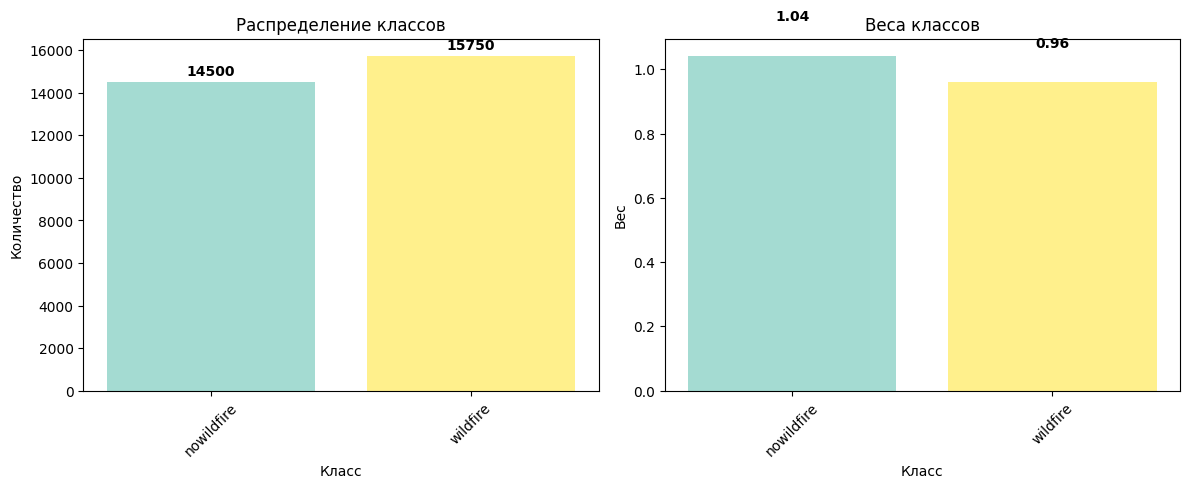

📊 РАСПРЕДЕЛЕНИЕ КЛАССОВ:
--------------------------------------------------
nowildfire      | 14500 | вес: 1.043
wildfire        | 15750 | вес: 0.960


In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

def get_class_weights_from_generator(generator, class_names):
    """
    Универсальная функция для расчета весов классов из ImageDataGenerator
    Работает с любым количеством классов
    """
    # Получаем все метки из генератора
    all_labels = generator.classes
    
    # Расчет весов
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(all_labels),
        y=all_labels
    )
    
    weights_dict = dict(enumerate(class_weights))
    
    # Визуализация
    plt.figure(figsize=(12, 5))
    
    # График 1: Распределение классов
    plt.subplot(1, 2, 1)
    unique, counts = np.unique(all_labels, return_counts=True)
    
    # Автоматическая генерация цветов по количеству классов
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique)))
    
    bars = plt.bar(range(len(unique)), counts, color=colors, alpha=0.8)
    plt.title('Распределение классов')
    plt.xlabel('Класс')
    plt.ylabel('Количество')
    plt.xticks(range(len(unique)), [class_names[i] for i in unique], rotation=45)
    
    # Цифры на столбцах
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01, 
                f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # График 2: Веса классов
    plt.subplot(1, 2, 2)
    bars = plt.bar(weights_dict.keys(), weights_dict.values(), color=colors, alpha=0.8)
    plt.title('Веса классов')
    plt.xlabel('Класс')
    plt.ylabel('Вес')
    plt.xticks(range(len(unique)), [class_names[i] for i in unique], rotation=45)
    
    # Цифры на столбцах
    for bar, weight in zip(bars, weights_dict.values()):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{weight:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Вывод информации
    print("📊 РАСПРЕДЕЛЕНИЕ КЛАССОВ:")
    print("-" * 50)
    for i, class_name in enumerate(class_names):
        count = counts[i] if i < len(counts) else 0
        weight = weights_dict.get(i, 0)
        print(f"{class_name:15} | {count:5} | вес: {weight:.3f}")
    
    return weights_dict

# ИСПОЛЬЗОВАНИЕ:

print("🎯 Расчет весов классов из тренировочных данных...")
class_weights = get_class_weights_from_generator(train_gen, class_names)

🖼️ По 1 случайному изображению из каждой категории:


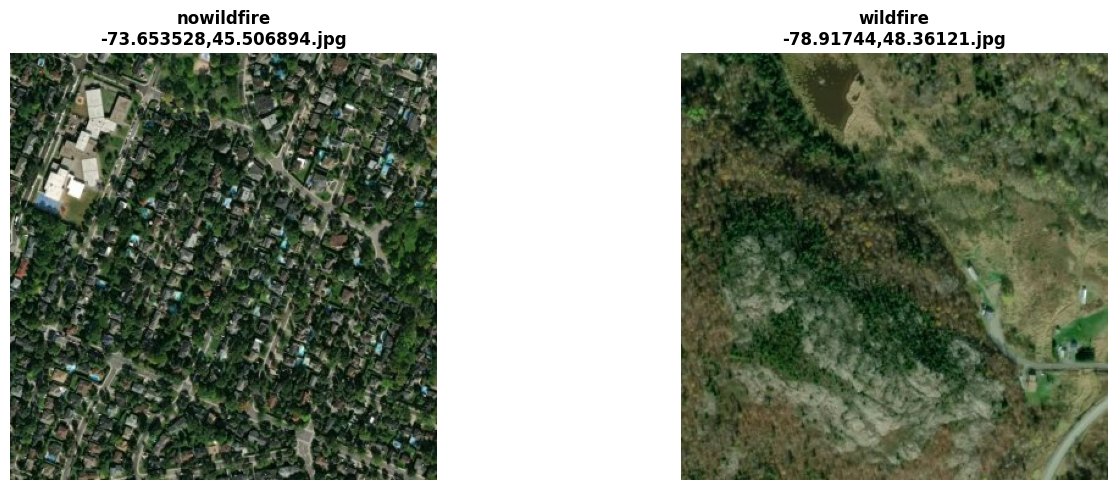

In [26]:
def show_one_random_image_per_category(generator, class_names, figsize=(15, 5)):
    """
    Показывает по 1 случайному изображению из каждой категории
    """
    # Получаем информацию о классах
    class_indices = generator.class_indices
    
    # Создаем subplot
    fig, axes = plt.subplots(1, len(class_names), figsize=figsize)
    
    # Если только один класс, делаем axes массивом
    if len(class_names) == 1:
        axes = [axes]
    
    # Для каждого класса
    for i, class_name in enumerate(class_names):
        class_idx = class_indices[class_name]
        # Находим индексы файлов этого класса
        class_file_indices = np.where(generator.classes == class_idx)[0]
        
        if len(class_file_indices) > 0:
            # Выбираем случайный файл
            random_idx = np.random.choice(class_file_indices)
            file_path = generator.filepaths[random_idx]
            
            # Загружаем и отображаем изображение
            img = plt.imread(file_path)
            
            axes[i].imshow(img)
            axes[i].set_title(f'{class_name}\n{os.path.basename(file_path)}', 
                            fontweight='bold')
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, f'No images\nin {class_name}', 
                       ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Использование упрощенной версии:
print("🖼️ По 1 случайному изображению из каждой категории:")
show_one_random_image_per_category(train_gen, class_names)

In [43]:
# v1 LivePlotCallback

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import IPython.display as display

class LivePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.fig = make_subplots(rows=1, cols=2, subplot_titles=('Loss', 'Accuracy'))
        self.loss_x, self.loss_y = [], []
        self.acc_x, self.acc_y = [], []
        self.val_loss_x, self.val_loss_y = [], []
        self.val_acc_x, self.val_acc_y = [], []
        
    def on_epoch_end(self, epoch, logs=None):
        # Обновляем данные
        self.loss_x.append(epoch)
        self.loss_y.append(logs['loss'])
        self.acc_x.append(epoch) 
        self.acc_y.append(logs['accuracy'])
        self.val_loss_x.append(epoch)
        self.val_loss_y.append(logs['val_loss'])
        self.val_acc_x.append(epoch)
        self.val_acc_y.append(logs['val_accuracy'])
        
        # Обновляем график
        self.fig.data = []
        self.fig.add_trace(go.Scatter(x=self.loss_x, y=self.loss_y, name='Train Loss'), row=1, col=1)
        self.fig.add_trace(go.Scatter(x=self.val_loss_x, y=self.val_loss_y, name='Val Loss'), row=1, col=1)
        self.fig.add_trace(go.Scatter(x=self.acc_x, y=self.acc_y, name='Train Acc'), row=1, col=2)
        self.fig.add_trace(go.Scatter(x=self.val_acc_x, y=self.val_acc_y, name='Val Acc'), row=1, col=2)
        
        # Показываем обновленный график
        display.clear_output(wait=True)
        self.fig.show()

# Теперь можно использовать
live_plot = LivePlotCallback()   

In [44]:
def create_head(x):
    # exp_9
    
    # 3. КЛАССИФИКАТОР С ДВОЙНЫМ POOLING
    gap = GlobalAveragePooling2D()(x)
    gmp = GlobalMaxPooling2D()(x)
    x = Concatenate()([gap, gmp])
    x = BatchNormalization()(x)
    
    # Первый слой с регуляризацией L2
    x = Dense(512, activation = 'relu', kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.7)(x)
    
    # Второй слой с регуляризацией L2
    x = Dense(128, activation = 'relu', kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    return x

In [51]:
# 🔥 ТЕСТИРУЕМ ПРЕДЕЛЬНЫЕ BATCH_SIZE ДЛЯ RTX 4070
def test_batch_size_limits():
    """Находит максимальный batch_size без ошибок памяти"""
    batch_sizes = [512, 384, 256, 192, 128]
    
    for bs in batch_sizes:
        try:
            print(f"🧪 Тестируем batch_size = {bs}")
            
            # Создаем тестовый генератор
            test_gen = train_datagen.flow_from_directory(
                train_dir,
                target_size=(224, 224),
                batch_size=bs,
                class_mode="binary"
            )
            
            # Пробуем получить один батч
            images, labels = next(test_gen)
            print(f"✅ batch_size = {bs} РАБОТАЕТ! Shape: {images.shape}")
            
            # Пробуем простую модель
            test_model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
                tf.keras.layers.GlobalAveragePooling2D(),
                tf.keras.layers.Dense(2, activation='softmax')
            ])
            test_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
            
            # Пробуем прямой проход
            _ = test_model.predict(images, verbose=0)
            print(f"🎯 batch_size = {bs} ПРОХОДИТ ВСЕ ТЕСТЫ!")
            return bs
            
        except Exception as e:
            print(f"❌ batch_size = {bs} - {e}")
            continue
    
    return 64  # fallback

MAX_BATCH_SIZE = test_batch_size_limits()
print(f"🎯 ИСПОЛЬЗУЕМ MAX_BATCH_SIZE = {MAX_BATCH_SIZE}")


🧪 Тестируем batch_size = 512
Found 30250 images belonging to 2 classes.
✅ batch_size = 512 РАБОТАЕТ! Shape: (512, 224, 224, 3)
🎯 batch_size = 512 ПРОХОДИТ ВСЕ ТЕСТЫ!
🎯 ИСПОЛЬЗУЕМ MAX_BATCH_SIZE = 512


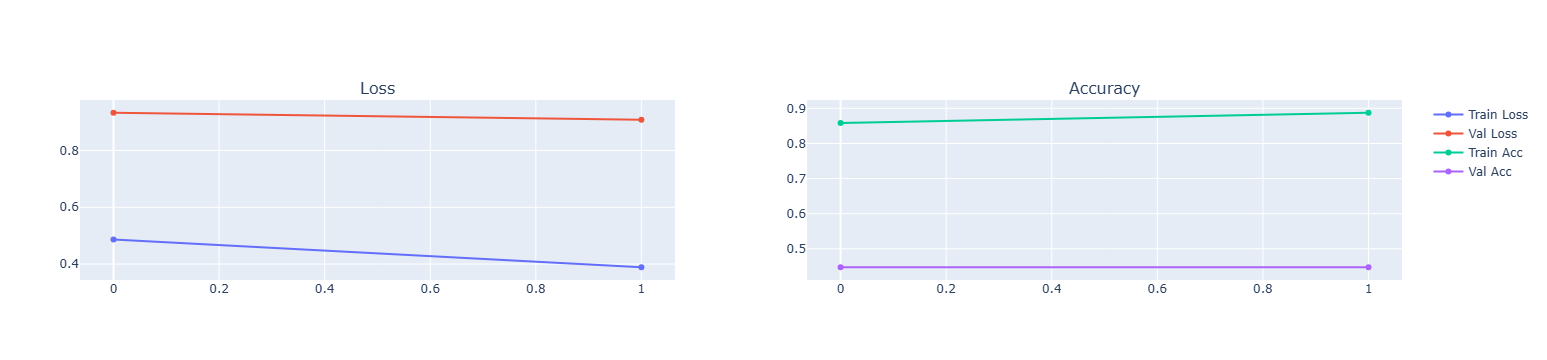

60/60 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8874 - loss: 0.3887 - val_accuracy: 0.4476 - val_loss: 0.9084 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.

📊 ОЦЕНКА ОБУЧЕННОЙ МОДЕЛИ...
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.4476 - loss: 0.9302
✅ Результаты обученной модели:
   - Test Accuracy: 0.4476
   - Test Loss: 0.9302
💾 Модель сохранена как 'best_wildfire_0.4476.keras


0

In [54]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# Обучаем финальную модель дольше
# Полный код для вашего случая

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetV2S, EfficientNetV2M, EfficientNetV2L
from tensorflow.keras.applications import EfficientNetV2B0, EfficientNetV2B1, EfficientNetV2B2, EfficientNetV2B3
from tensorflow.keras.applications import ConvNeXtTiny, ConvNeXtSmall, ConvNeXtBase, ConvNeXtLarge, ConvNeXtXLarge  

from tensorflow.keras import layers, Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Dropout, BatchNormalization, Activation, Concatenate, Add)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import datetime
import os
#from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2


# Использование LivePlotCallback
live_plot = LivePlotCallback()

import gc
#tf.keras.backend.clear_session()
gc.collect()     # принудительно очищаем
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=0'
tf.get_logger().setLevel('ERROR')

# 🔧 СЛОВАРЬ MODELS:
MODELS = {
    # EfficientNetV2 Family (рекомендуется)
    'EfficientNetV2B0': EfficientNetV2B0,
    'EfficientNetV2B1': EfficientNetV2B1, 
    'EfficientNetV2B2': EfficientNetV2B2,
    'EfficientNetV2B3': EfficientNetV2B3,
    'EfficientNetV2S': EfficientNetV2S,
    'EfficientNetV2M': EfficientNetV2M, 
    'EfficientNetV2L': EfficientNetV2L,
   
    # ResNet Family  
    'ResNet50': ResNet50,
    # 'ResNeXt50': ResNeXt50,

    #   print("⚠️ ConvNeXt не установлен. Для установки: pip install convnext-tensorflow")
    # ConvNeXt Family
    'ConvNeXtTiny': ConvNeXtTiny,
    'ConvNeXtSmall': ConvNeXtSmall,
    'ConvNeXtBase': ConvNeXtBase, 
    'ConvNeXtLarge': ConvNeXtLarge,
    'ConvNeXtXLarge': ConvNeXtXLarge,
}

# 🎯 ЗАДАЙТЕ ЭТИ ПЕРЕМЕННЫЕ ПЕРЕД ЗАПУСКОМ:

#model_name = 'EfficientNetV2S'  # Или 'EfficientNetV2S' и т.д.

model_name = 'ConvNeXtTiny'  # Или 'EfficientNetV2S' и т.д.
#model_name = 'ConvNeXtSmall'  # Или 'EfficientNetV2S' и т.д.
#model_name = 'ConvNeXtBase'  # Или 'EfficientNetV2S' и т.д.
#model_name = 'ConvNeXtLarge'  # Или 'EfficientNetV2S' и т.д.

height, width = 224, 224


inputs = tf.keras.Input(shape=(height, width, 3))

base_model = MODELS[model_name](weights='imagenet', include_top=False, input_shape=(height, width, 3))
#base_model = MODELS[model_name](weights='imagenet', include_top=False, input_shape=(height, width, 3))
base_model.trainable = False

x = base_model(inputs, training=False)


#==========================ГОЛОВА===============================
# Создаём и добавляем головную часть
x = create_head(x)
#==========================ГОЛОВА===============================

# Завершённый слой классификации
outputs = Dense(num_classes, activation='softmax')(x)

learning_rate = 0.001 

# Собираем и компилируем модель
model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑
#debug = input("Нажми Enter чтобы продолжить...") # 🛑 Остановка для отладки
#########################################################################################
'''
final_history = model.fit(
        train_data,
        epochs=50,
        validation_data=validation_data,
        class_weight=class_weights,  # ← вот это если надо функция баланса классов class_weights
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, verbose=1),
            tf.keras.callbacks.ModelCheckpoint(f'best_model_callback.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=7, factor=0.1, verbose=1),
            #tensorboard_callback,
            live_plot,
            #wandb.keras.WandbCallback(monitor="val_accuracy", mode="max", save_model=True, log_weights=True, log_gradients=True)
        ],
        verbose=1

        # Сохранение модели с новым параметром   
    )
'''

# # Добавьте эту функцию и оберните ваши datasets
# def add_error_handling(dataset):
#     """Добавляет обработку ошибок к dataset"""
#     return dataset.apply(tf.data.experimental.ignore_errors())

# # Оберните ваши datasets перед обучением
# train_data_safe = add_error_handling(train_data)
# validation_data_safe = add_error_handling(validation_data)

# Используйте безопасные datasets в обучении
final_history = model.fit(
    train_gen,  # ← используем безопасный dataset
    epochs=2,
    validation_data=valid_gen,  # ← и здесь
    class_weight=class_weights,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, verbose=1),
        tf.keras.callbacks.ModelCheckpoint(f'best_model_callback.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=7, factor=0.1, verbose=1),
        live_plot,
    ],
    verbose=1
)
#🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑
#debug = input("Нажми Enter чтобы продолжить...") # 🛑 Остановка для отладки
#########################################################################################

# ОЦЕНКА ОБУЧЕННОЙ МОДЕЛИ
print(f"\n📊 ОЦЕНКА ОБУЧЕННОЙ МОДЕЛИ...")
val_results = model.evaluate(test_gen, verbose=1)
val_loss, val_accuracy = val_results[0], val_results[1]
print(f"✅ Результаты обученной модели:")
print(f"   - Test Accuracy: {val_accuracy:.4f}")
print(f"   - Test Loss: {val_loss:.4f}")

# 8. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
# Сохраняем модель
model.save(f'best_wildfire_{val_accuracy:.4f}.keras')
print(f"💾 Модель сохранена как 'best_wildfire_{val_accuracy:.4f}.keras")

import gc
tf.keras.backend.clear_session()
gc.collect()     # принудительно очищаем

# 


📊 АНАЛИЗ ДАТАСЕТА:
  cane: 4863 файлов
  cavallo: 2623 файлов
  elefante: 1446 файлов
  farfalla: 2112 файлов
  gallina: 3098 файлов
  gatto: 1668 файлов
  mucca: 1866 файлов
  pecora: 1820 файлов
  ragno: 4821 файлов
  scoiattolo: 1862 файлов
📈 ИТОГО: 26179 изображений, 10 классов


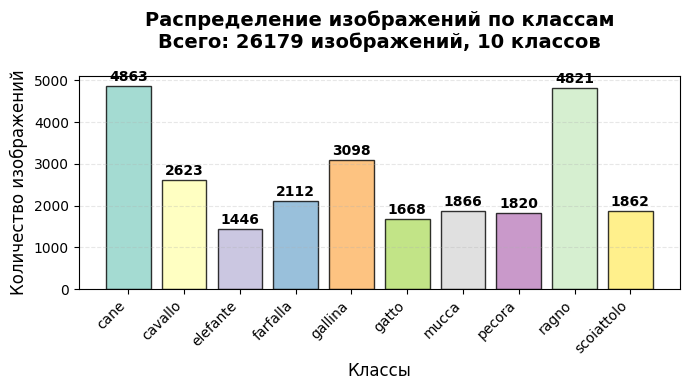

In [5]:
# Простой анализ датасета с визуализацией

import os
import matplotlib.pyplot as plt
import numpy as np

def analyze_dataset_simple(dataset_path):
    """
    Простой анализ датасета с визуализацией
    """
    # Проверяем существование пути
    if not os.path.exists(dataset_path):
        print(f"❌ Ошибка: путь '{dataset_path}' не существует")
        return None
    
    # Получаем список классов
    class_names = [d for d in os.listdir(dataset_path) 
                  if os.path.isdir(os.path.join(dataset_path, d))]
    class_names.sort()
    
    if not class_names:
        print("❌ В датасете не найдено папок с классами")
        return None
    
    # Подсчет файлов
    class_counts = {}
    total_files = 0
    
    print("📊 АНАЛИЗ ДАТАСЕТА:")
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        count = len(image_files)
        class_counts[class_name] = count
        total_files += count
        print(f"  {class_name}: {count} файлов")
    
    print(f"📈 ИТОГО: {total_files} изображений, {len(class_names)} классов")
    
    # Визуализация
    plt.figure(figsize=(7, 4))
    
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    # Создаем диаграмму
    bars = plt.bar(classes, counts, color=plt.cm.Set3(np.linspace(0, 1, len(classes))), 
                   edgecolor='black', alpha=0.8)
    
    # Настройки графика
    plt.title(f'Распределение изображений по классам\nВсего: {total_files} изображений, {len(class_names)} классов', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Классы', fontsize=12)
    plt.ylabel('Количество изображений', fontsize=12)
    
    # Поворачиваем подписи и выравниваем
    plt.xticks(rotation=45, ha='right')
    
    # Добавляем значения на столбцы
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Добавляем сетку для удобства чтения
    plt.grid(True, axis='y', alpha=0.3, linestyle='--')
    
    # Настраиваем отступы
    plt.tight_layout()
    
    plt.show()
    
    return {'class_names': class_names, 'class_counts': class_counts, 'total_files': total_files}

# ИСПОЛЬЗОВАНИЕ:
# Просто вызовите функцию с путем к вашему датасету
result = analyze_dataset_simple(IMAGE_PATH)

In [34]:
# ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ
print(f"\n🧪 ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ...")
test_results = model.evaluate(test_gen, verbose=1)
test_loss, test_accuracy, test_precision, test_recall, test_auc = test_results
print(f"✅ Результаты на тестовых данных:")
print(f"   - Test Loss: {test_loss:.4f}")
print(f"   - Test Accuracy: {test_accuracy:.4f}")
print(f"   - Test Precision: {test_precision:.4f}")
print(f"   - Test Recall: {test_recall:.4f}")
print(f"   - Test AUC: {test_auc:.4f}")


🧪 ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ...
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.8060 - loss: 0.5307


ValueError: not enough values to unpack (expected 5, got 2)

In [ ]:
!tensorboard --logdir logs/fit

/home/oleg/miniconda3/envs/TF/lib/python3.10/site-packages/tensorboard/default.py:30: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


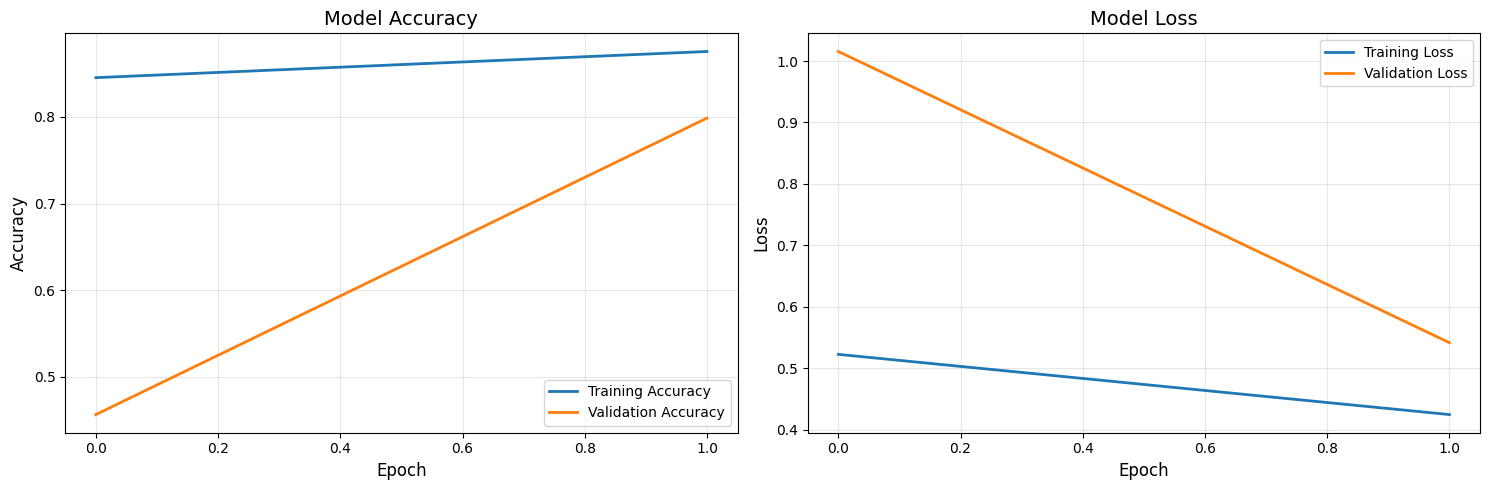

In [35]:
# Визуализация результатов

import matplotlib.pyplot as plt
import numpy as np

#history = final_history

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # График точности
    ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    ax1.set_title('Model Accuracy', fontsize=14)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # График потерь
    ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax2.set_title('Model Loss', fontsize=14)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Построим графики
plot_training_history(final_history)

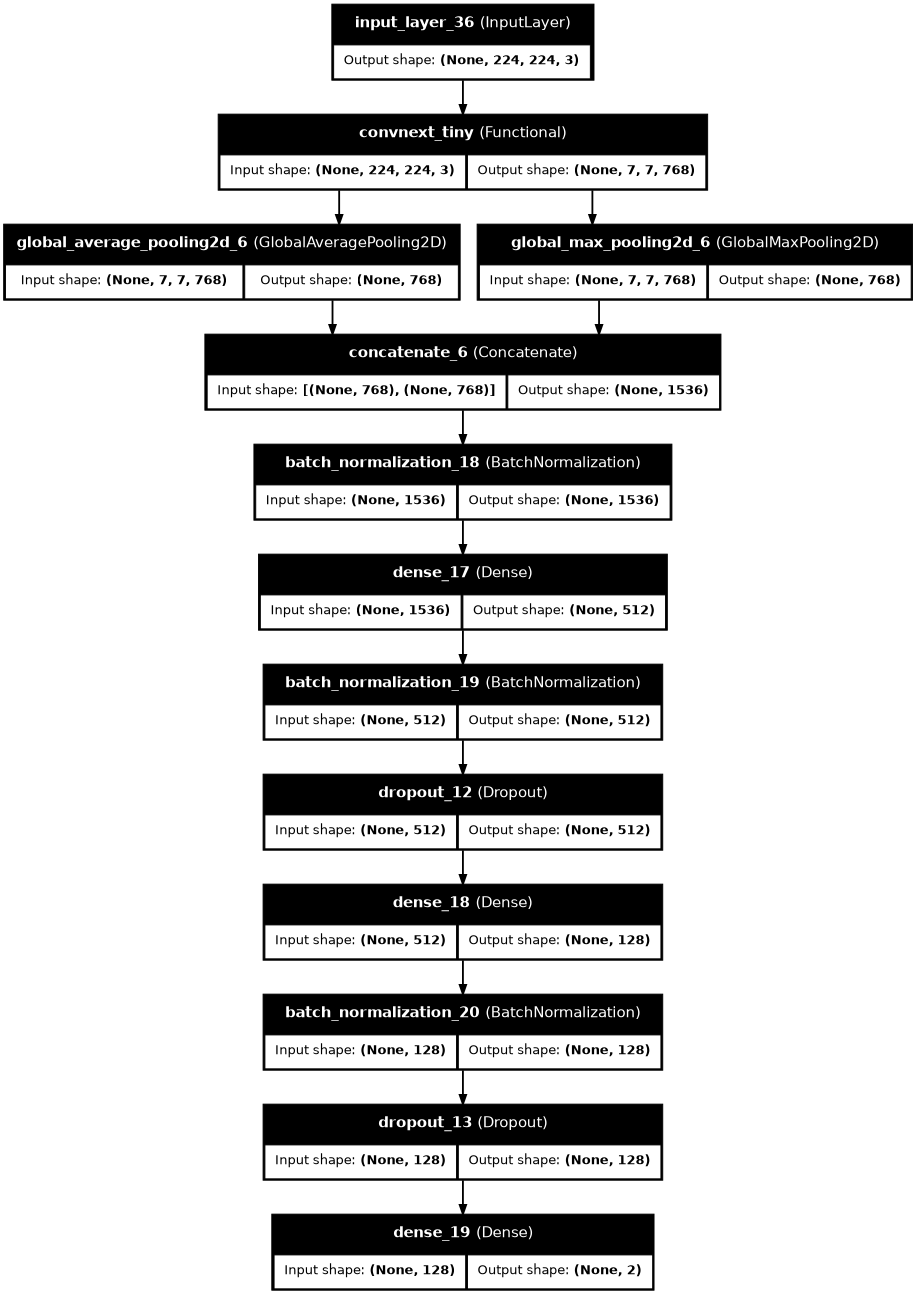

In [36]:
from tensorflow.keras.utils import plot_model
from PIL import Image

loaded_model = tf.keras.models.load_model('best_wildfire_0.8060.keras')
#loaded_model.summary()


# # ОЦЕНКА ЗАГРУЖЕННОЙ МОДЕЛИ
# print(f"\n📊 ОЦЕНКА ЗАГРУЖЕННОЙ МОДЕЛИ...")
# val_results = loaded_model.evaluate(validation_data, verbose=1)
# val_loss, val_accuracy = val_results[0], val_results[1]
# print(f"✅ Результаты обученной модели:")
# print(f"   - Validation Accuracy: {val_accuracy:.4f}")
# print(f"   - Validation Loss: {val_loss:.4f}")

# 8. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
# Сохраняем модель
# loaded_model.save(f'trained_model_optuna_{val_accuracy:.4f}.keras')
# print("💾 Модель сохранена как 'trained_model_optuna_{val_accuracy:.4f}'")

plot_model(loaded_model, to_file=f'best_animals10__{val_accuracy:.4f}.png', show_shapes=True, show_layer_names=True, dpi=66)
#display(Image.open('model_temp.png'))
#plot_model(loaded_model, to_file=f'best_optuna_model_{val_accuracy:.4f}.png')


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

history = final_history

'''
Синие тона:
cmap='Blues' # твой текущий
cmap='viridis' 
cmap='coolwarm'
cmap='icefire'

Зеленые тона:
cmap='Greens'
cmap='viridis'
cmap='summer'

Красные/оранжевые:
cmap='Reds'
cmap='Oranges'
cmap='YlOrBr'  
cmap='hot'

Фиолетовые:
cmap='Purples'
cmap='magma'
cmap='plasma'
'''


def get_all_predictions_modern(model, dataset):
    """Получает все предсказания и метки из датасета"""
    print("🔄 Собираем предсказания и метки...")
    
    all_preds = []
    all_true_labels = []
    
    # Проходим по всем батчам датасета
    for batch_idx, (images, labels) in enumerate(dataset):
        # Получаем предсказания для текущего батча
        batch_preds = model.predict(images, verbose=0)
        all_preds.append(batch_preds)
        all_true_labels.append(labels.numpy())
        
        # Прогресс каждые 10 батчей
        if (batch_idx + 1) % 10 == 0:
            print(f"📦 Обработано батчей: {batch_idx + 1}")
    
    # Объединяем все батчи
    all_preds = np.concatenate(all_preds, axis=0)
    all_true_labels = np.concatenate(all_true_labels, axis=0)
    
    print(f"✅ Собрано {len(all_preds)} предсказаний")
    return all_preds, all_true_labels

def safe_confusion_matrix_analysis(model, dataset, class_names):
    """Безопасный анализ confusion matrix с автоматической обработкой отсутствующих классов"""
    print("📊 ЗАПУСКАЕМ CONFUSION MATRIX АНАЛИЗ...")
    
    # Получаем предсказания
    print("🔄 Получаем предсказания...")
    preds, true_labels = get_all_predictions_modern(model, dataset)
    
    # Для sparse categorical - метки уже целые числа, не нужно argmax
    if len(true_labels.shape) == 1:  # sparse labels [0, 1, 2, ...]
        true_classes = true_labels
    else:  # one-hot encoded labels
        true_classes = np.argmax(true_labels, axis=1)
    
    preds_classes = np.argmax(preds, axis=1)
    
    # Находим какие классы реально присутствуют в данных
    present_true_classes = np.unique(true_classes)
    present_pred_classes = np.unique(preds_classes)
    
    print(f"🔢 Уникальные истинные классы: {present_true_classes}")
    print(f"🔢 Уникальные предсказанные классы: {present_pred_classes}")
    
    # Определяем какие классы из class_names реально присутствуют
    present_class_indices = sorted(present_true_classes)
    present_class_names = [class_names[i] for i in present_class_indices]
    
    print(f"📋 Присутствующие классы: {present_class_names}")
    
    absent_classes = [class_names[i] for i in range(len(class_names)) if i not in present_true_classes]
    if absent_classes:
        print(f"❌ Отсутствующие классы: {absent_classes}")
    
    # Создаем confusion matrix только для присутствующих классов
    cm = confusion_matrix(true_classes, preds_classes, labels=present_class_indices)
    
    print(f"📏 Confusion matrix shape: {cm.shape}")
    
    # Визуализируем
    plt.figure(figsize=(max(8, len(present_class_names)), max(6, len(present_class_names))))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=present_class_names, 
                yticklabels=present_class_names,
                cbar_kws={'label': 'Количество'})
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title(f'Confusion Matrix ({len(present_class_names)} из {len(class_names)} классов)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Статистика
    total_samples = len(true_classes)
    accuracy = np.sum(preds_classes == true_classes) / total_samples
    
    print(f"\n📈 ДЕТАЛЬНАЯ СТАТИСТИКА:")
    print(f"Всего примеров: {total_samples}")
    print(f"Общая точность: {accuracy:.4f}")
    
    print(f"\n🎯 ТОЧНОСТЬ ПО КЛАССАМ:")
    for i, class_idx in enumerate(present_class_indices):
        class_name = class_names[class_idx]
        correct = cm[i, i]
        total = np.sum(cm[i, :])
        accuracy = correct / total if total > 0 else 0
        print(f"  {class_name}: {accuracy:.4f} ({correct}/{total})")
    
    # Для отсутствующих классов
    if absent_classes:
        print(f"\n❌ ОТСУТСТВУЮЩИЕ КЛАССЫ В ВАЛИДАЦИИ:")
        for class_name in absent_classes:
            print(f"  {class_name}: 0 примеров")
    
    # Classification report только для присутствующих классов
    print(f"\n📊 CLASSIFICATION REPORT:")
    print(classification_report(true_classes, preds_classes, 
                              labels=present_class_indices,
                              target_names=present_class_names, 
                              digits=4))
    
    # Нормализованная confusion matrix
    plt.figure(figsize=(max(8, len(present_class_names)), max(6, len(present_class_names))))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Заменяем NaN на 0
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=present_class_names, 
                yticklabels=present_class_names,
                cbar_kws={'label': 'Доля'})
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title(f'Normalized Confusion Matrix\n({len(present_class_names)} из {len(class_names)} классов)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return cm, present_class_names

# 🎯 ЗАПУСКАЕМ АНАЛИЗ
print("🚀 ЗАПУСК CONFUSION MATRIX АНАЛИЗА...")
cm, present_classes = safe_confusion_matrix_analysis(loaded_model, test_gen, class_names)

🚀 ЗАПУСК CONFUSION MATRIX АНАЛИЗА...
📊 ЗАПУСКАЕМ CONFUSION MATRIX АНАЛИЗ...
🔄 Получаем предсказания...
🔄 Собираем предсказания и метки...


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

🎲 ЗАПУСК УНИВЕРСАЛЬНОГО ТЕСТИРОВАНИЯ...
📥 Загружаем данные из dataset...
📊 Загружено 5235 изображений
📐 Формат изображений: (5235, 224, 224, 3)
🏷️ Формат меток: (5235,)
🎯 Делаем предсказания...
🔍 Обнаружен формат меток: SPARSE


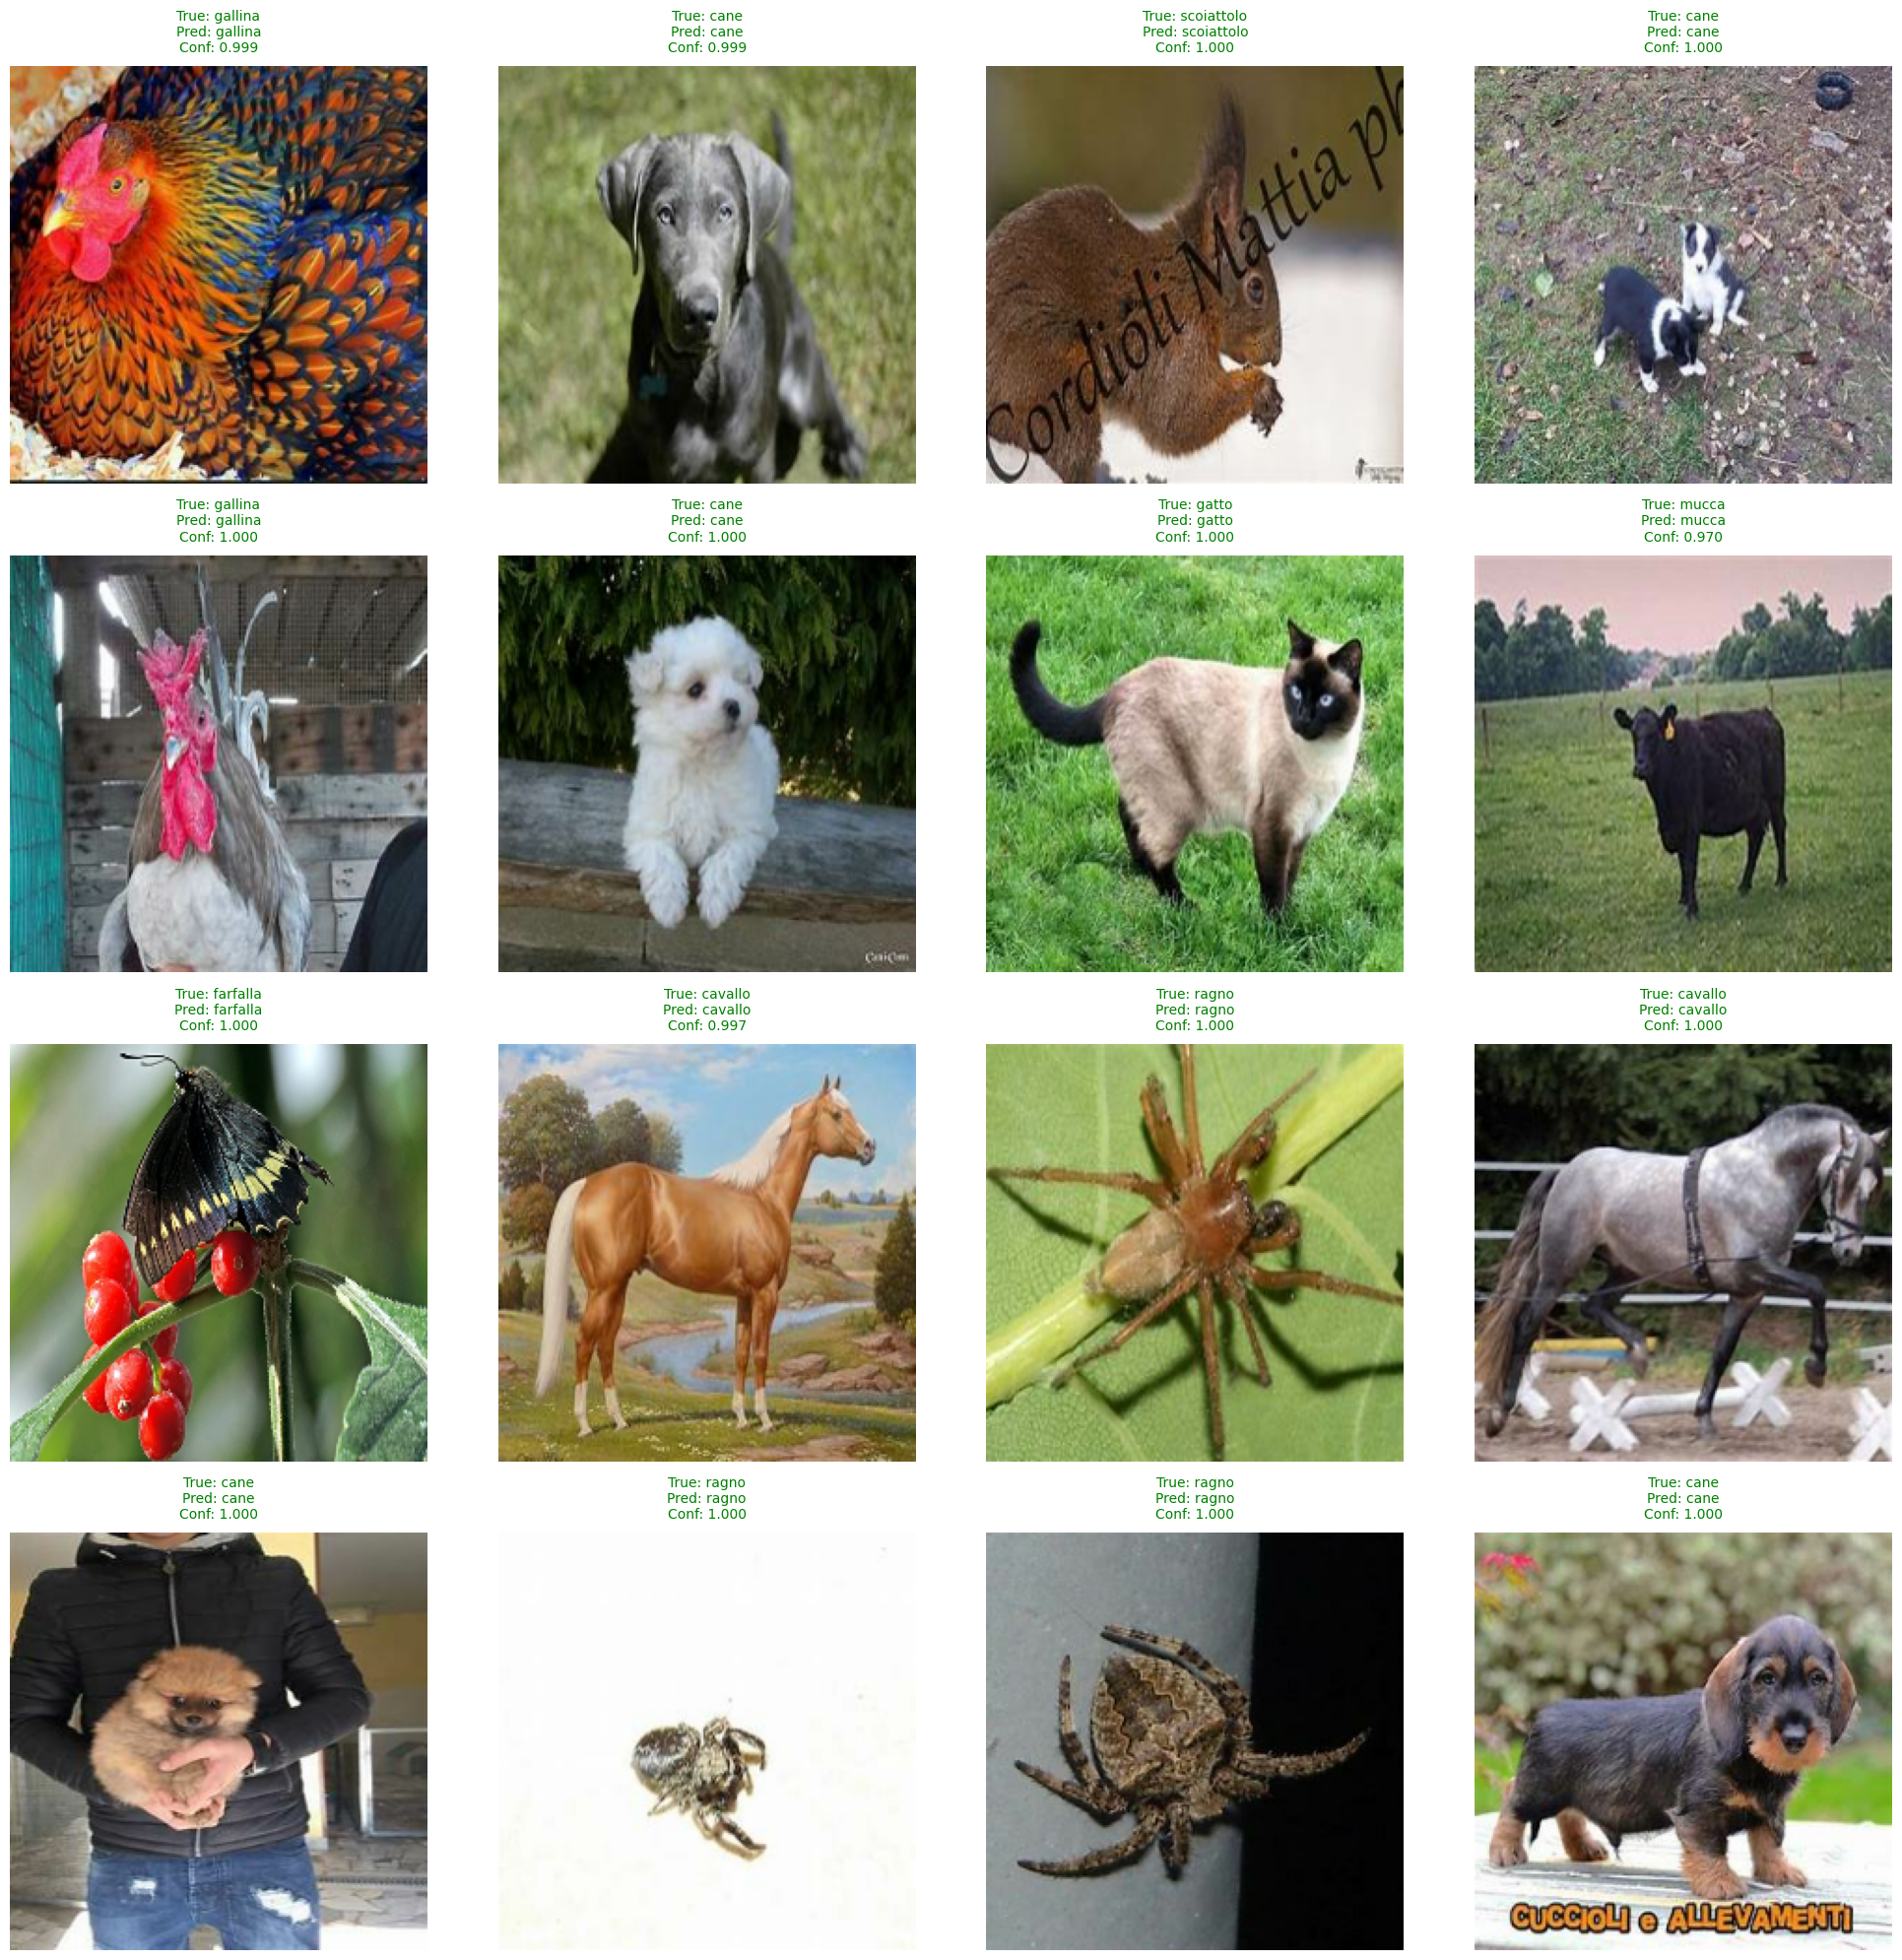


📊 РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ:
   Правильных предсказаний: 16/16
   Точность: 100.0%
   Формат меток: SPARSE
   Диапазон изображений: [0.000, 255.000]
✅ Тестирование завершено!


In [60]:
# УНИВЕРСАЛЬНАЯ ВЕРСИЯ ДЛЯ ЛЮБОГО ФОРМАТА ДАННЫХ
def test_random_predictions_universal(model, dataset, class_names, num_samples=12):
    """
    Универсальная функция для тестирования модели на случайных примерах
    Работает с любым форматом меток (sparse, one-hot) и любым форматом изображений
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Собираем все данные из dataset
    print("📥 Загружаем данные из dataset...")
    all_images = []
    all_labels = []
    
    for batch_images, batch_labels in dataset:
        all_images.append(batch_images.numpy())
        all_labels.append(batch_labels.numpy())
    
    # Объединяем все батчи
    all_images = np.concatenate(all_images, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    print(f"📊 Загружено {len(all_images)} изображений")
    print(f"📐 Формат изображений: {all_images.shape}")
    print(f"🏷️ Формат меток: {all_labels.shape}")
    
    # Выбираем случайные примеры
    total_samples = len(all_images)
    num_samples = min(num_samples, total_samples)
    indices = np.random.choice(total_samples, num_samples, replace=False)
    
    selected_images = all_images[indices]
    selected_labels = all_labels[indices]
    
    # Делаем предсказания
    print("🎯 Делаем предсказания...")
    predictions = model.predict(selected_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Определяем формат меток автоматически
    if len(selected_labels.shape) == 1:
        # SPARSE формат: [0, 1, 2, ...]
        true_classes = selected_labels
        label_format = "SPARSE"
    else:
        # ONE-HOT формат: [[1,0,0], [0,1,0], ...]
        true_classes = np.argmax(selected_labels, axis=1)
        label_format = "ONE-HOT"
    
    print(f"🔍 Обнаружен формат меток: {label_format}")
    
    # Создаем визуализацию
    cols = 4
    rows = (num_samples + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    
    # Если только одна строка, преобразуем axes в 2D массив
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    correct_predictions = 0
    
    # Обрабатываем каждый пример
    for i in range(num_samples):
        row = i // cols
        col = i % cols
        ax = axes[row, col]
        
        # Получаем изображение
        image = selected_images[i].copy()
        
        # 🔥 УМНАЯ ДЕНОРМАЛИЗАЦИЯ ДЛЯ ЛЮБОГО ФОРМАТА
        if image.min() >= -1 and image.max() <= 1:
            # EfficientNet V2 предобработка: [-1, 1] -> [0, 255]
            image = (image + 1) * 127.5
        elif image.min() >= 0 and image.max() <= 1:
            # Стандартная нормализация: [0, 1] -> [0, 255]
            image = image * 255
        elif image.min() >= 0 and image.max() <= 255:
            # Уже в правильном диапазоне
            pass
        else:
            # ImageNet нормализация: восстанавливаем оригинальные значения
            image = image * 255
        
        # Обеспечиваем правильный диапазон
        image = np.clip(image, 0, 255).astype(np.uint8)
        
        # 🔥 ПРАВИЛЬНОЕ ОТОБРАЖЕНИЕ ЦВЕТОВ
        # TensorFlow использует RGB, matplotlib использует RGB
        # НЕ нужно преобразовывать цвета!
        ax.imshow(image)
        
        # Получаем истинный и предсказанный классы
        true_class_idx = true_classes[i]
        pred_class_idx = predicted_classes[i]
        
        true_class_name = class_names[true_class_idx]
        pred_class_name = class_names[pred_class_idx]
        confidence = np.max(predictions[i])
        
        # 🔥 ПРАВИЛЬНОЕ ОПРЕДЕЛЕНИЕ ЦВЕТА
        is_correct = (true_class_idx == pred_class_idx)
        title_color = 'green' if is_correct else 'red'
        
        if is_correct:
            correct_predictions += 1
        
        # Создаем заголовок
        title = f"True: {true_class_name}\nPred: {pred_class_name}\nConf: {confidence:.3f}"
        ax.set_title(title, color=title_color, fontsize=10, pad=10)
        ax.axis('off')
    
    # Скрываем пустые subplots
    for i in range(num_samples, rows * cols):
        row = i // cols
        col = i % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Выводим статистику
    accuracy = (correct_predictions / num_samples) * 100
    print(f"\n📊 РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ:")
    print(f"   Правильных предсказаний: {correct_predictions}/{num_samples}")
    print(f"   Точность: {accuracy:.1f}%")
    print(f"   Формат меток: {label_format}")
    print(f"   Диапазон изображений: [{selected_images.min():.3f}, {selected_images.max():.3f}]")
    
    return correct_predictions, accuracy

# ТЕСТИРУЕМ УНИВЕРСАЛЬНУЮ ВЕРСИЮ
print("🎲 ЗАПУСК УНИВЕРСАЛЬНОГО ТЕСТИРОВАНИЯ...")
print("=" * 50)

correct, accuracy = test_random_predictions_universal(
    model=model,
    dataset=validation_data, 
    class_names=class_names,
    num_samples=16
)

print("=" * 50)
print(f"✅ Тестирование завершено!")

In [ ]:
# Сохраните модель

# Сохраняем обученную модель
model.save('cats_dogs_classifier.h5')
print("💾 Модель сохранена как 'cats_dogs_classifier.h5'")

# Или сохраняем только веса
model.save_weights('cats_dogs_weights.h5')
print("💾 Веса сохранены как 'cats_dogs_weights.h5'")

In [32]:
# Сохраняем в современном формате
model.save('best_model_scotp-2.keras')
print("💾 Модель сохранена как 'best_model_1.keras'")

💾 Модель сохранена как 'best_model_1.keras'
